In [1]:
## Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
## Reading data into a dataframe

df_pokemon = pd.read_csv('/Users/satishreddychirra/Document/Pokemon.csv')

In [3]:
df_pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
# Dropping ID column
df_pokemon.drop(['#'], axis=1, inplace=True)

In [6]:
# Removing special characters from column names

df_pokemon.columns = df_pokemon.columns.str.replace(" ","") # Space
df_pokemon.columns = df_pokemon.columns.str.replace(".","") # Period

In [7]:
df_pokemon.columns

Index(['Name', 'Type1', 'Type2', 'Total', 'HP', 'Attack', 'Defense', 'SpAtk',
       'SpDef', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [8]:
df_pokemon.head()

,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [9]:
# Generations
df_pokemon.Generation.unique()

array([1, 2, 3, 4, 5, 6])

## Visualization

In [10]:
## Mean HP of legendary and non-legendary pokemons over six generations

# Calculating the group wise data
df_sub = round(df_pokemon.groupby(['Generation','Legendary'])[['HP']].mean(),2).reset_index()
df_sub.Legendary = np.where(df_sub.Legendary == True, 'Legendary', 'Non-Legendary')

# Pivoting the results to visualize using bar charts
df_sub = df_sub.pivot(index='Generation', columns='Legendary', values='HP')
df_sub.columns.name = None # Dropping multi-level column index
df_sub.reset_index(inplace=True)


In [11]:
df_sub

,Generation,Legendary,Non-Legendary
0,1,98.00,64.61
1,2,103.40,69.61
2,3,81.67,64.63
3,4,100.85,69.74
4,5,96.13,69.35
5,6,87.50,66.19


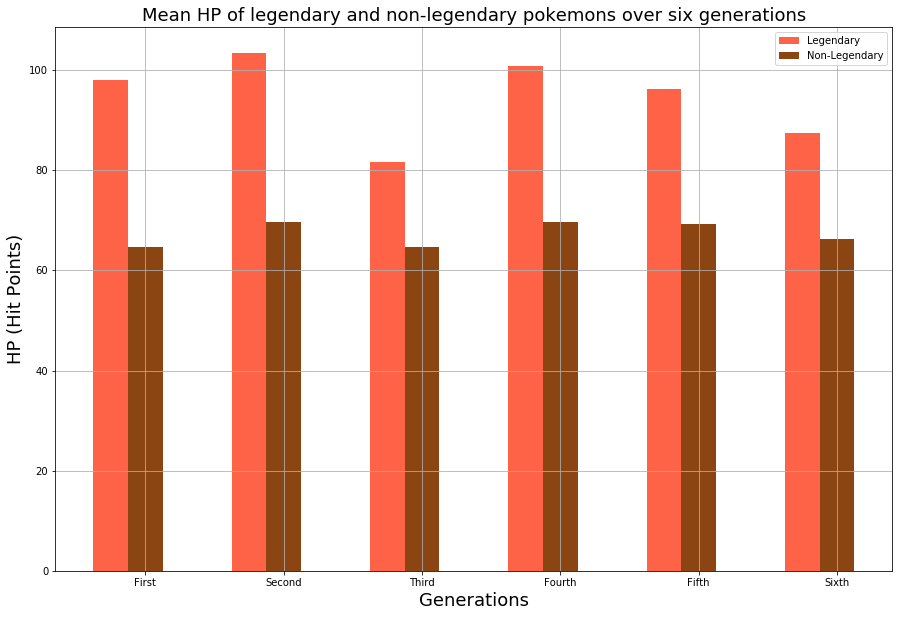

In [12]:
## Creating a grouped bar chart 

# Setting indices and width 
ind = list(range(len(df_sub['Legendary']))) 
width = 0.25 
    
# Creating bar chart for Legendary pokemons
plt.bar(ind, df_sub['Legendary'], width, color='tomato', label='Legendary') 

# Creating bar chart for Non-Legendary pokemons
plt.bar([i + width for i in ind], df_sub['Non-Legendary'], width, color='saddlebrown', label='Non-Legendary') 

# Set the chart's title
plt.title('Mean HP of legendary and non-legendary pokemons over six generations', fontsize=18)

# set x-axis label of plot
plt.xlabel("Generations", fontsize=18)

# set y-axis label of plot
plt.ylabel("HP (Hit Points)", fontsize=18)

# set ticker of x-axis
plt.xticks([i + width for i in ind], ('First', 'Second', 'Third', 'Fourth', 'Fifth', 'Sixth'))

# Adding the legend, grid, figure size and showing the plot
plt.legend(loc='best')
plt.grid()
fig=plt.gcf()  
fig.set_size_inches(15,10)
plt.show()

### Marks and Channels used in the above plot

Number of Attributes: 3

Marks: Lines

Channel: 
    - Position: Both (Horizontal and Vertical)
    - Color: tomato, saddlebrown (Legendary vs Non-Legendary)
    - Size: Length and Area


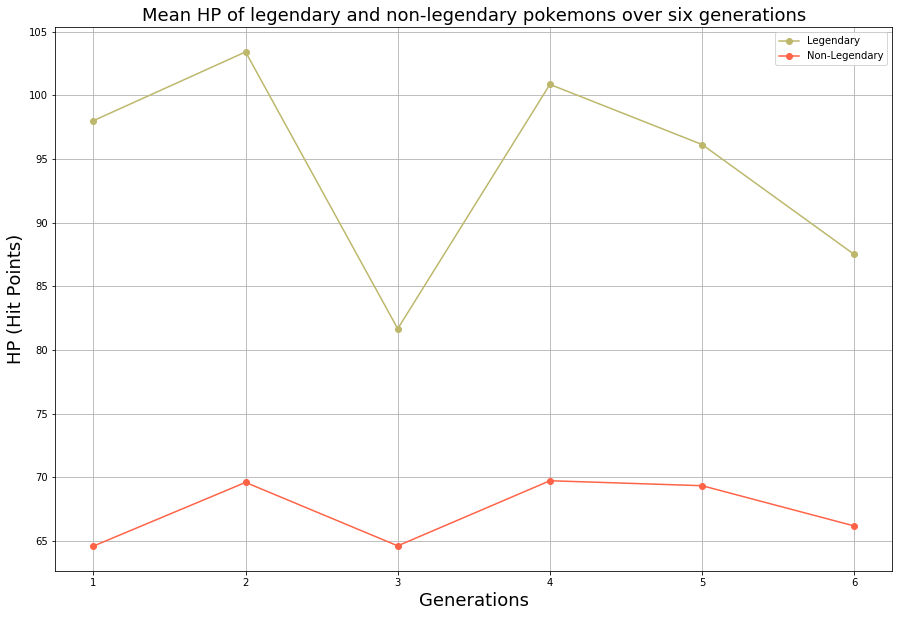

In [13]:
## Generating a scatter line plot

# Create a scatter line plot for legnedary pokemons
plt.plot(df_sub.Generation, df_sub.Legendary, color='darkkhaki', label='Legendary', marker='o', linestyle='-') 

# Create a scatter line plot for Non-Legendary pokemons
plt.plot(df_sub.Generation, df_sub['Non-Legendary'], color='tomato', label="Non-Legendary", marker='o', linestyle='-')

# Set plot title
plt.title('Mean HP of legendary and non-legendary pokemons over six generations', fontsize=18)

# set x-axis label of plot
plt.xlabel("Generations", fontsize=18)

# set y-axis label of plot
plt.ylabel("HP (Hit Points)", fontsize=18)

# Adding legend, grid, figure size and showing plot
plt.legend()
plt.grid()
fig=plt.gcf()  
fig.set_size_inches(15,10)
plt.show()




### Marks and Channels used in the above plot

Number of Attributes: 3

Marks: Points and Lines

Channel: 
    - Position: Both (Horizontal and Vertical)
    - Color: tomato, saddlebrown (Legendary vs Non-Legendary)

### Description
 
    a. 3D Bar chart (No Unjustified 3D), there is no need for a extra dimension as the number of variable dimensions depicted should not exceed the number of dimensions in the data. Also avoid the Lie factor and confusion due to depth.
    Pie chart are not effective when we are dealing with more than one variable and especially if it contains many similar sized slices. 
    
    Reference: 
    [1] Lecture2 - Rules of Thumb and Design: slides 21,27
    [2] Lecture3 - Marks and Channels: slides 31


    b. 
    - Grouped Bar Chart
        Bar charts are effective for showing the changes in data over time or groups (Generations in this case). However the effectiveness of using Area comes in the middle of magnitude channels and also in channel ranking by data type (Quantitative). The data-ink ratio is also not good in the above plot as we are using more ink.
    
    - Scatter Line Plot
        Effectiveness rank of position in channel ranking by datatype for both Categorical and Ordinal variables is first which makes scatter line plot a very effective way to encode the given data, data-ink ratio is optimal. The only drawback is very simple encoding of data.
        
    Reference: 
    [1] Lecture2 - Rules of Thumb and Design: slides 24,
    [2] Lecture3 - Marks and Channels: slides 27, 28, 40, 44
    [3] Lecture4 - Data Types: slides 21, 22
        

    c. Bar plot is effective to some extent but clearly scatter plot is most effective encoding of the both as Channel ranking by data type in which position is top ranked for both Quantitative and Ordinal, data-ink ratio is optimal for scatter line plot and very easy to intrepret the message conveyed by the visualization.

    Reference: 
    [1] Lecture2 - Rules of Thumb and Design: slides 24,
    [2] Lecture3 - Marks and Channels: slides 27, 28, 40, 44
    [3] Lecture4 - Data Types: slides 21, 22


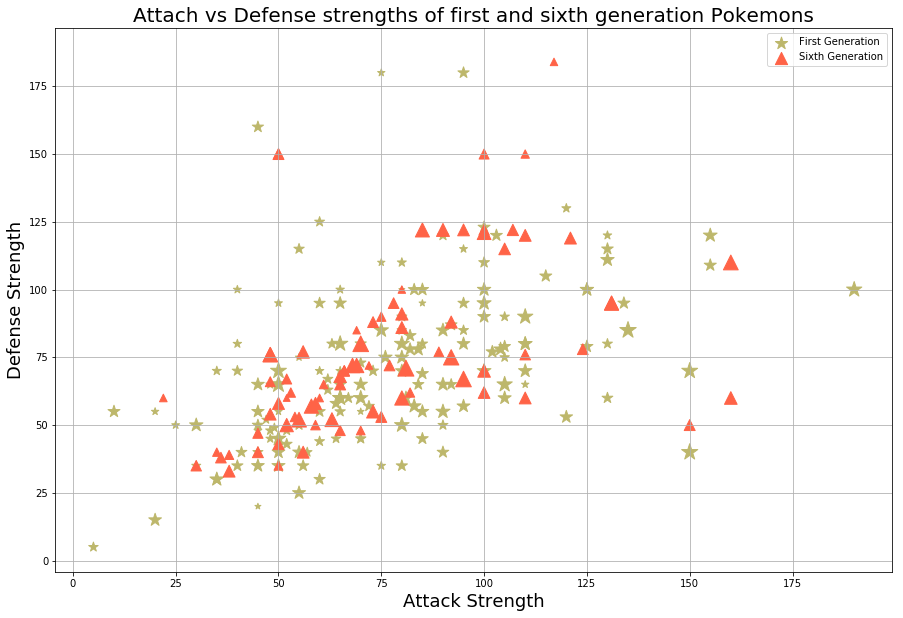

In [14]:
### Extra ###

## Attack vs Defence strengths of pokemons of first and sixth generations

# Filtering data and extracting the first, sixth generations pokemon data
df_gen1, df_gen6 = df_pokemon[df_pokemon.Generation == 1], df_pokemon[df_pokemon.Generation == 6]

# Create a scatter plot with Attack and Defence of first generation pokemons 
# indicated by marker '*' and speed of pokemon is indicated by size of the marker scaled by factor 2
plt.scatter(df_gen1.Attack, df_gen1.Defense, color='darkkhaki', label='First Generation', marker="*", s=2*df_gen1.Speed) 

# Create a scatter plot with Attack and Defence of sixth generation pokemons 
# indicated by marker '^' and speed of pokemon is indicated by size of the marker scaled by factor 2
plt.scatter(df_gen6.Attack, df_gen6.Defense, color='tomato', label="Sixth Generation", marker="^", s=2*df_gen6.Speed)

# Set the plot title and fontsize
plt.title("Attach vs Defense strengths of first and sixth generation Pokemons", fontsize=20)

# set x-axis label of plot
plt.xlabel("Attack Strength", fontsize=18)

# set y-axis label of plot
plt.ylabel("Defense Strength", fontsize=18)

# Adding legend, grid, figure size and showing plot
plt.legend()
plt.grid()
fig=plt.gcf()  
fig.set_size_inches(15,10)
plt.show()



### Marks and Channels used in the above plot

Number of Attributes: 4

Marks: points

Channel: 
    - Position: Both (Horizontal and Vertical)
    - Color: darkkhaki, tomato
    - Shape: *, ^
    - Size: Area (Speed of Pokemon)
